# Lecture 15: Sampling

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Probability: Calculation vs Simulation

Roll a six-sided die 20 times. What's P(at least one 6)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Calculation

In [3]:
1 - (5/6)**20

0.9739159466954111

In [4]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(3))

Rolls | Chance of at least one 6
1     | 16.667%
2     | 30.556%
3     | 42.130%
4     | 51.775%
5     | 59.812%
6     | 66.510%
7     | 72.092%
8     | 76.743%
9     | 80.619%
10    | 83.849%
... (40 rows omitted)

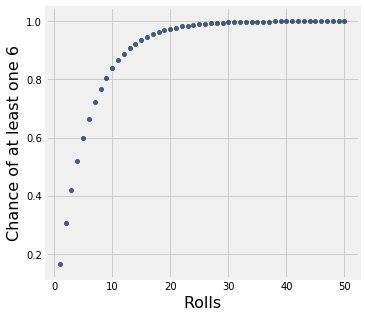

In [5]:
at_least_one.scatter('Rolls')

In [6]:
at_least_one.where('Rolls', 20)

Rolls | Chance of at least one 6
20    | 97.392%

### Simulation

How many of the following return a random number from 1 to 6 (inclusive), with each number equally likely?

- `np.random.choice(np.arange(6))`  
- `np.random.choice(np.arange(6)+1)`  
- `np.random.choice(np.arange(1,6+1))`  
- `np.random.choice(np.arange(1,3+1))` + `np.random.choice(np.arange(1,3+1))`

A. 0  
B. 1  
C. 2  
D. 3  
E. 4  

<br/><br/><br/><br/><br/><br/>

In [9]:
rolls = np.random.choice(np.arange(1,6+1), 20)
rolls

array([6, 3, 1, 3, 5, 6, 3, 2, 2, 6, 4, 2, 5, 1, 2, 5, 4, 1, 1, 4])

In [10]:
rolls==6

array([ True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [11]:
sum(rolls==6)

3

In [12]:
sum(rolls==6)>0

True

In [ ]:
# at least one 6?
sum(rolls==6) > 0

In [19]:
# Simulate that experiment many times

trials = 10000
successes = 0  # success means at least one 6

for i in np.arange(trials):
    rolls = np.random.choice(np.arange(1,6+1), 20)
    if sum(rolls==6) > 0:
        successes = successes + 1

successes/trials

0.9712

## Sampling

In [20]:
top = Table.read_table('top_movies_2020.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top

Row Index | Title                       | Gross (Adjusted) | Gross     | Studio          | Est. Num Tickets | Year
0         | 2001: A Space Odyssey       | 409683573        | 60405931  | MGM             | 43,722,900       | 1968
1         | Airport                     | 619462881        | 100489151 | Universal       | 66,111,300       | 1970
2         | Aladdin                     | 491384351        | 217350219 | Disney          | 52,442,300       | 1992
3         | Alice in Wonderland         | 394495740        | 334191110 | Disney          | 42,102,000       | 2010
4         | American Graffiti           | 615742991        | 115000000 | Universal       | 65,714,300       | 1973
5         | American Sniper             | 403659600        | 350126372 | Warner Brothers | 43,080,000       | 2014
6         | An Officer and a Gentleman  | 409065153        | 129795554 | Paramount       | 43,656,900       | 1982
7         | Apollo 13                   | 373466649        | 173837933 | Universal       | 39,857,700       | 1995
8         | Armageddon                  | 402726348        | 201578182 | Disney          | 42,980,400       | 1998
9         | Around the World in 80 Days | 605446298        | 42000000  | United Artists  | 64,615,400       | 1956
... (190 rows omitted)

### Deterministic sampling

In [21]:
top.take([3, 5, 7])

Row Index | Title               | Gross (Adjusted) | Gross     | Studio          | Est. Num Tickets | Year
3         | Alice in Wonderland | 394495740        | 334191110 | Disney          | 42,102,000       | 2010
5         | American Sniper     | 403659600        | 350126372 | Warner Brothers | 43,080,000       | 2014
7         | Apollo 13           | 373466649        | 173837933 | Universal       | 39,857,700       | 1995

In [23]:
top.where('Title', are.containing('and the')).show()

### Probabilistic (random) sampling

In [26]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, start+5))

Row Index | Title                                 | Gross (Adjusted) | Gross     | Studio         | Est. Num Tickets | Year
7         | Apollo 13                             | 373466649        | 173837933 | Universal      | 39,857,700       | 1995
8         | Armageddon                            | 402726348        | 201578182 | Disney         | 42,980,400       | 1998
9         | Around the World in 80 Days           | 605446298        | 42000000  | United Artists | 64,615,400       | 1956
10        | Austin Powers: The Spy Who Shagged Me | 380038767        | 206040086 | Newline        | 40,559,100       | 1999
11        | Avatar                                | 911790952        | 760507625 | Fox            | 97,309,600       | 2009

In [27]:
indices = np.arange(1, top.num_rows+1)
indices

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [32]:
random_indices = np.random.choice(indices, 5)
random_indices

array([ 52, 115,  80,  84,  94])

In [33]:
top.take(random_indices)

Row Index | Title                        | Gross (Adjusted) | Gross     | Studio         | Est. Num Tickets | Year
52        | Goldfinger                   | 621231000        | 51081062  | United Artists | 66,300,000       | 1964
115       | Rambo: First Blood Part II   | 397011585        | 150415432 | Tristar        | 42,370,500       | 1985
80        | It's a Mad Mad Mad Mad World | 504812498        | 46332858  | MGM            | 53,875,400       | 1963
84        | Jurassic World               | 719518552        | 652385625 | Universal      | 76,789,600       | 2015
94        | Men in Black                 | 511758479        | 250690539 | Sony           | 54,616,700       | 1997

In [36]:
top.sample(5)

Row Index | Title                                                        | Gross (Adjusted) | Gross     | Studio    | Est. Num Tickets | Year
19        | Beauty and the Beast                                         | 532665760        | 504481165 | Disney    | 56,848,000       | 2017
151       | The Chronicles of Narnia: The Lion, the Witch and the Wa ... | 423300994        | 291710957 | Disney    | 45,176,200       | 2005
102       | National Lampoon's Animal House                              | 561172111        | 141600000 | Universal | 59,890,300       | 1978
179       | The Sound of Music                                           | 1335086324       | 159287539 | Fox       | 142,485,200      | 1965
74        | Indiana Jones and the Raiders of the Lost Ark                | 829651658        | 248159971 | Paramount | 88,543,400       | 1981

In [37]:
top.take(np.arange(5)).sample(5, with_replacement=False)

Row Index | Title                 | Gross (Adjusted) | Gross     | Studio    | Est. Num Tickets | Year
4         | American Graffiti     | 615742991        | 115000000 | Universal | 65,714,300       | 1973
0         | 2001: A Space Odyssey | 409683573        | 60405931  | MGM       | 43,722,900       | 1968
3         | Alice in Wonderland   | 394495740        | 334191110 | Disney    | 42,102,000       | 2010
2         | Aladdin               | 491384351        | 217350219 | Disney    | 52,442,300       | 1992
1         | Airport               | 619462881        | 100489151 | Universal | 66,111,300       | 1970

In [38]:
top.take(np.arange(5)).sample(5, with_replacement=True)

Row Index | Title               | Gross (Adjusted) | Gross     | Studio    | Est. Num Tickets | Year
1         | Airport             | 619462881        | 100489151 | Universal | 66,111,300       | 1970
2         | Aladdin             | 491384351        | 217350219 | Disney    | 52,442,300       | 1992
3         | Alice in Wonderland | 394495740        | 334191110 | Disney    | 42,102,000       | 2010
2         | Aladdin             | 491384351        | 217350219 | Disney    | 52,442,300       | 1992
1         | Airport             | 619462881        | 100489151 | Universal | 66,111,300       | 1970

## Sampling from dice

In [39]:
d6 = Table().with_column('face', np.arange(1,6+1))
d6

face
1
2
3
4
5
6

In [40]:
def face_hist(t):
    """
    Draw a histogram of the number of times each face (1-6) 
    occurs in table t.
    """
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plots.xlabel('Face')

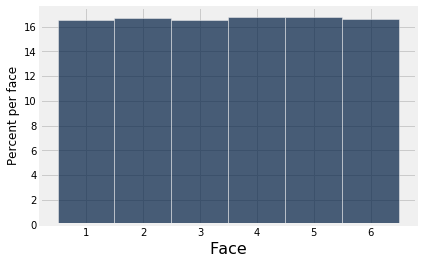

In [44]:
face_hist(d6.sample(100000))  # 100, 1_000, 10_000, 100_000

**Discussion question:** What do you expect to happen to the histogram as the sample size increases?

In [ ]:
for i in np.arange(1,5+1):
    face_hist(d6.sample(10 ** i))

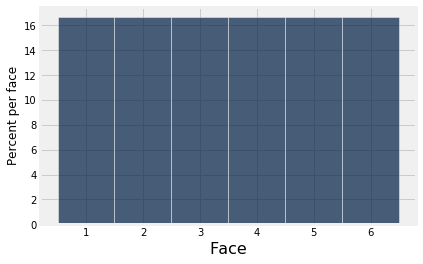

In [45]:
# With larger samples, getting closer and closer to:
face_hist(d6)

## Sampling flights

In [46]:
united = Table.read_table('united.csv')
united

Date   | Flight Number | Destination | Delay
6/1/15 | 73            | HNL         | 257
6/1/15 | 217           | EWR         | 28
6/1/15 | 237           | STL         | -3
6/1/15 | 250           | SAN         | 0
6/1/15 | 267           | PHL         | 64
6/1/15 | 273           | SEA         | -6
6/1/15 | 278           | SEA         | -8
6/1/15 | 292           | EWR         | 12
6/1/15 | 300           | HNL         | 20
6/1/15 | 317           | IND         | -10
... (13722 rows omitted)

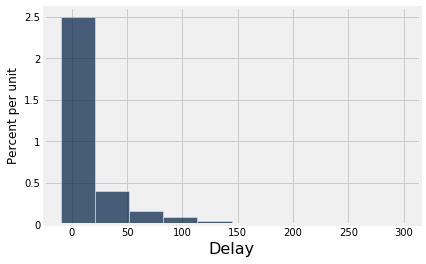

In [47]:
# Who knows the probability distribution?
# But let's take that table as the population.
united.hist('Delay')

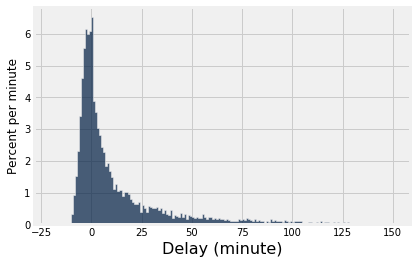

In [48]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-20, 151, 1))
    
delay_hist(united)

In [49]:
# Most delays between 1 and 20 min
between1and20 = united.where('Delay', are.between(1, 20)).num_rows
num_delays = united.where('Delay', are.above(0)).num_rows
between1and20 / num_delays

0.5882877148313176

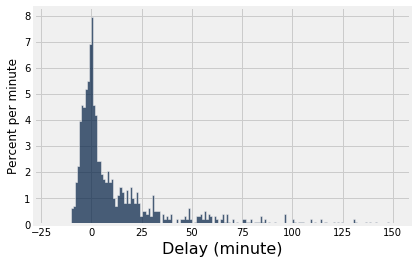

In [52]:
# Empirical distribution of a random sample
# looks like probability distribution, and more
# so as sample size increases
s = united.sample(1000)
delay_hist(s)